### Importing Necessary libraries

In [1]:
# NumPy: For mathematical funcations, array, matrices operations
import numpy as np 

# Graph: Plotting graphs and other visula tools
import pandas as pd
import seaborn as sns

sns.set(color_codes=True)

#To enable inline plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline

# Disable warning
import warnings
warnings.filterwarnings("ignore")

### Load Data

In [2]:
# Load data set
# Import CSV data using pandas data frame
df_original = pd.read_csv('concrete.csv')

# Print total columns
print("Total Colums in dataframe: ", len(df_original.columns))

# Prepare columns names
df_original_columns = []
for column in df_original.columns:
    df_original_columns.append(column)


    
print("Columns list {}".format(df_original_columns))
print("***********************************************************************************************************************")

# Prepare mapping of column names for quick access
df_original_columns_map = {}
map_index: int = 0
for column in df_original_columns:
    df_original_columns_map[map_index] = column
    map_index = map_index + 1
    
print("Columns Map {}".format(df_original_columns_map))

Total Colums in dataframe:  9
Columns list ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']
***********************************************************************************************************************
Columns Map {0: 'cement', 1: 'slag', 2: 'ash', 3: 'water', 4: 'superplastic', 5: 'coarseagg', 6: 'fineagg', 7: 'age', 8: 'strength'}


## Data Pre-Processing

### Data Shape

In [3]:
df_original.shape

(1030, 9)

### Data Info

In [4]:
df_original.info()
# All row items are numeric in nature, hence no label encoding is required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### Data 

In [5]:
df_original.head(16)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0    141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1    168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2    250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3    266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4    154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
5    255.0    0.0    0.0  192.0           0.0      889.8    945.0   90   
6    166.8  250.2    0.0  203.5           0.0      975.6    692.6    7   
7    251.4    0.0  118.3  188.5           6.4     1028.4    757.7   56   
8    296.0    0.0    0.0  192.0           0.0     1085.0    765.0   28   
9    155.0  184.0  143.0  194.0           9.0      880.0    699.0   28   
10   151.8  178.1  138.7  167.5          18.3      944.0    694.6   28   
11   173.0  116.0    0.0  192.0           0.0      946.8    856.8    3   
12   385.0    0.0    0.0  186.0           0.0      966.0    763.0   14   
13   237.5  237.5    0.0  228.0           0.0      932.0    594.0    7   
14   167.0  187.0  195.0  185.0           7.0      898.0    636.0   28   
15   213.8   98.1   24.5  181.7           6.7     1066.0    785.5  100   

    strength  
0      29.89  
1      23.51  
2      29.22  
3      45.85  
4      18.29  
5      21.86  
6      15.75  
7      36.64  
8      21.65  
9      28.99  
10     36.35  
11      6.94  
12     27.92  
13     26.26  
14     23.89  
15     49.97

### Data Description

In [6]:
df_original.describe().T

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

## Checking for Missing value, duplicate data, incorrect data and perform data cleansing

### Empty NA Values

In [7]:
df_original.isna().sum()
# No null values are present in data

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

### Duplicates

In [8]:
df_duplicates = df_original.duplicated()

print('Number of duplicate rows = {}'.format(df_duplicates.sum()))

# 25 duplicates

# We are not modyfying original dataframe instead our all operations
# will be on `df_main`
df_main = df_original.drop_duplicates() 

df_main.shape

Number of duplicate rows = 25


(1005, 9)

### Pearson Correlation

In [9]:
df_main.corr(method ='pearson')
# Eg. Present of cement, superplastic and more value of age result more strength of the mixture

cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.303324 -0.385610 -0.056625      0.060906  -0.086205   
slag         -0.303324  1.000000 -0.312352  0.130262      0.019800  -0.277559   
ash          -0.385610 -0.312352  1.000000 -0.283314      0.414213  -0.026468   
water        -0.056625  0.130262 -0.283314  1.000000     -0.646946  -0.212480   
superplastic  0.060906  0.019800  0.414213 -0.646946      1.000000  -0.241721   
coarseagg    -0.086205 -0.277559 -0.026468 -0.212480     -0.241721   1.000000   
fineagg      -0.245375 -0.289685  0.090262 -0.444915      0.207993  -0.162187   
age           0.086348 -0.042759 -0.158940  0.279284     -0.194076  -0.005264   
strength      0.488283  0.103374 -0.080648 -0.269624      0.344209  -0.144717   

               fineagg       age  strength  
cement       -0.245375  0.086348  0.488283  
slag         -0.289685 -0.042759  0.103374  
ash           0.090262 -0.158940 -0.080648  
water        -0.444915  0.279284 -0.269624  
superplastic  0.207993 -0.194076  0.344209  
coarseagg    -0.162187 -0.005264 -0.144717  
fineagg       1.000000 -0.156572 -0.186448  
age          -0.156572  1.000000  0.337367  
strength     -0.186448  0.337367  1.000000

### Body of Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faef7133a50>,
      dtype=object)

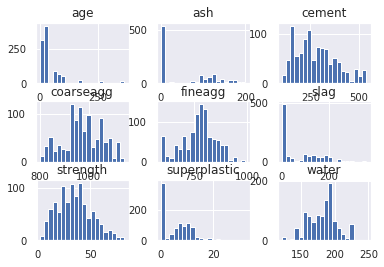

In [10]:
df_main.hist(bins=20, xlabelsize=10, ylabelsize=10)
# We can see that data is not distributed properly and there are tails present on either side of gaussian curve

### Pairplot

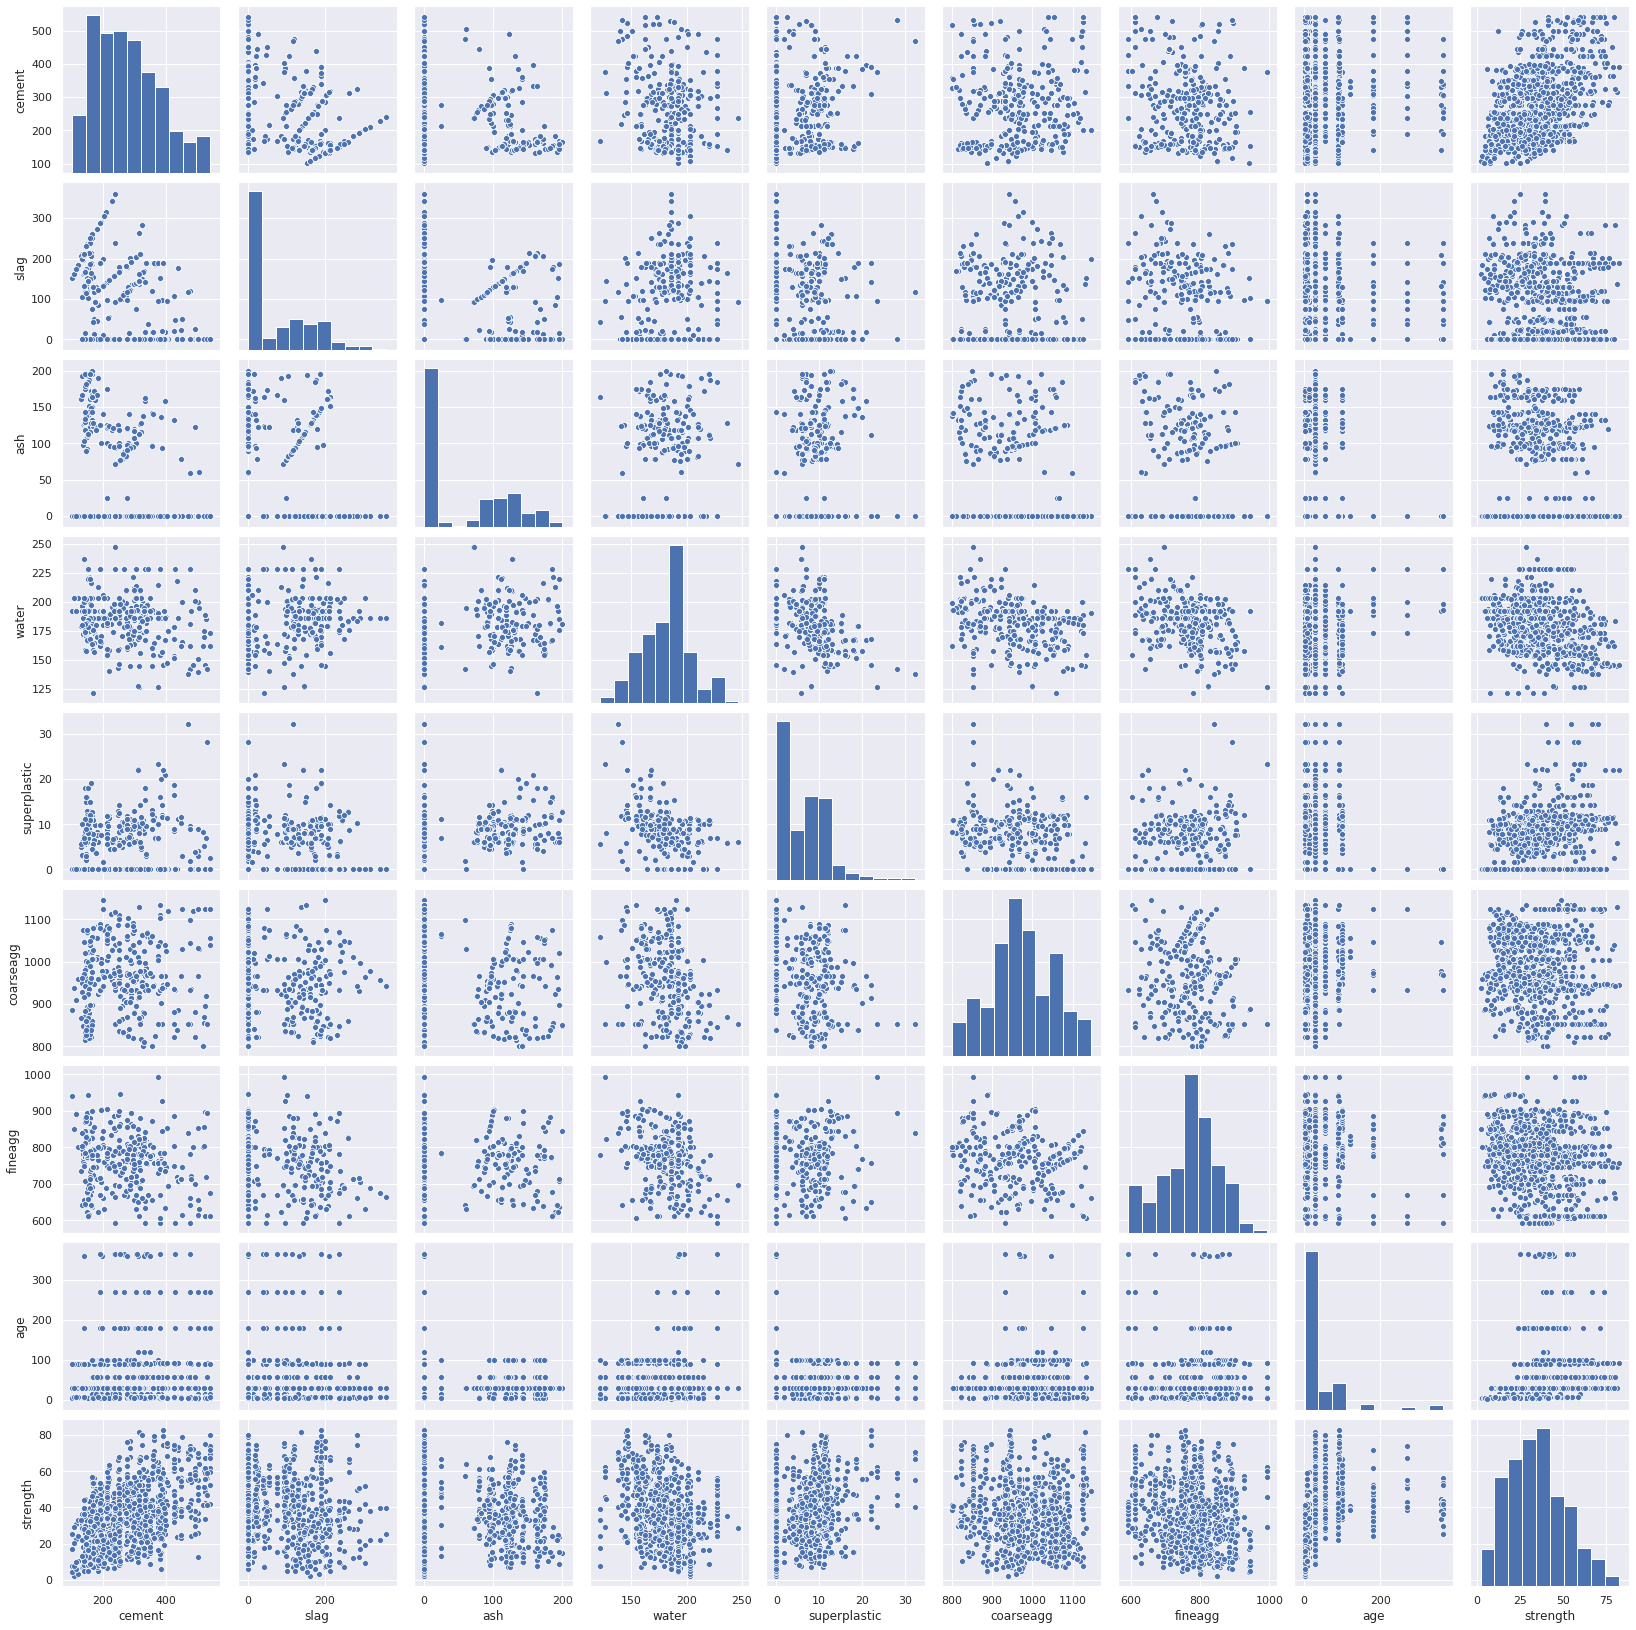

In [11]:
sns.pairplot(df_main)
# We do not see any positive curve or negative curve but there is a cloud 
# which indicates the presence of cement add strength though not direct relation

### Evaluation of different models

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


class ModelEvaluator:
    
    def __init__(self, dataFrame):
        self.dataFrame = dataFrame
        self.modelResullt = {}
        self.algorithms = {
            "linearRegression" :  LinearRegression(),
            "lasso" :  Lasso(),
            "ridge" :  Ridge(),
            "adaBoostRegressor" : AdaBoostRegressor(),
            "extraTreeRegressor" :  ExtraTreesRegressor(),
            "randomForestRegressor" : RandomForestRegressor(),
            "gradientBoostRegressor" : GradientBoostingRegressor(),
            "decisionTreeRegressor" : DecisionTreeRegressor(),
            "knnRegressor" : KNeighborsRegressor()
        }
    
    def printDf_X(self):
        print(self.df_X)
        
    def printDf_Y(self):
        print(self.df_Y)
        
    def splitData(self):
        print("Splitting data into train ,test and validation")
        test_size = 0.2
        seed = 29
        self.df_X = self.dataFrame.copy().drop(['strength'], axis = 1)
        self.df_Y = self.dataFrame['strength']
        
        self.X_train, self.X_test, self.y_train, self.y_test = \
            train_test_split(self.df_X, self.df_Y, test_size=test_size, random_state=seed)
        
        self.X_train, self.X_val, self.y_train, self.y_val = \
            train_test_split(self.df_X, self.df_Y, test_size=test_size, random_state=seed)
        
    
    def runSimplePipelines(self):       
        print("Running simple pipelines")
        
        self.decentModels  = {}
        
        for item in self.algorithms:
            # Init pipe
            itemPipe = Pipeline([("scaler", MinMaxScaler()), (item, self.algorithms[item])])
            
            #fit data 
            itemPipe.fit(self.X_train, self.y_train)
            
            print ("**********   {}   ************".format(item))
            
            print("")
            score  = itemPipe.score(self.X_test, self.y_test)
            print("Test score is {:.2f}". format(score))
            print("")
           
            cross_val = cross_val_score(self.algorithms[item], self.X_train, self.y_train)
            cross_val = cross_val.ravel()
            print ("cross validatioion score")
            print ("cv-mean :",cross_val.mean())
            print ("cv-std  :",cross_val.std())
            print ("cv-max  :",cross_val.max())
            print ("cv-min  :",cross_val.min())
            print("")
            
            # We aree considering 0.85 s the minim score we need for our prediction
            if score >= 0.85:
                self.decentModels[item] = score
           
    def printDecentModels(self):
        print("Top performing models are: ")
        for topModel in self.decentModels:
            print("{} score {}".format(topModel, self.decentModels[topModel]))

    def deecentModels(self):
        return selff.decentModels
    
    def runGridSearchCV_HyperParameterTuningPipelines(self, param1, param2):
        print("Running gridsearch cv hyper parameter pipelines")
        for topModel in self.decentModels:
            
            # Init pipe
            regressor = self.algorithms[topModel]

            itemPipe = Pipeline([("scaler", MinMaxScaler()), (topModel, regressor)])
            
            if topModel == 'extraTreeRegressor' or topModel == 'randomForestRegressor':

                gsCv = GridSearchCV(estimator = regressor, param_grid = param1, 
                              cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
                #fit data 
                gsCv.fit(self.X_train, self.y_train)

                print ("**********   {}   ************".format(topModel))

                print("")

                print("Best parameter {} ".format(gsCv.best_params_))

                best_grid = gsCv.best_estimator_

                score = best_grid.score(self.X_val, self.y_val)

                print("Best score is {} ".format(score))
            elif topModel == 'decisionTreeRegressor':
                gsCv = GridSearchCV(estimator = regressor, param_grid = param2, 
                              cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
                #fit data 
                gsCv.fit(self.X_train, self.y_train)

                print ("**********   {}   ************".format(topModel))

                print("")

                print("Best parameter {} ".format(gsCv.best_params_))

                best_grid = gsCv.best_estimator_

                score = best_grid.score(self.X_val, self.y_val)

                print("Best score is {} ".format(score))
                
        
    def runRandomSearchCV_HyperParameterTuningPipelines(self, param1, param2):
        print("Running randomsearch cv hyper parameter pipelines")
        for topModel in self.decentModels:
            print("")
            print ("**********   {}   ************".format(topModel))

            # Init pipe
            regressor = self.algorithms[topModel]

            itemPipe = Pipeline([("scaler", MinMaxScaler()), (topModel, regressor)])
            
            if topModel == 'extraTreeRegressor' or topModel == 'randomForestRegressor':

                randCv = RandomizedSearchCV(estimator = regressor, param_distributions = param1, 
                              cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
                #fit data 
                randCv.fit(self.X_train, self.y_train)

               
                print("Best parameter {} ".format(randCv.best_params_))

                best_random = randCv.best_estimator_

                score = best_random.score(self.X_val, self.y_val)

                print("Best score is {} ".format(score))
                
            elif topModel == 'gradientBoostRegressor':
                randCv = RandomizedSearchCV(estimator = regressor, param_distributions = param2, 
                              cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
                #fit data 
                randCv.fit(self.X_train, self.y_train)
                
                print("Best parameter {} ".format(randCv.best_params_))

                best_random = randCv.best_estimator_

                score = best_random.score(self.X_val, self.y_val)
                print("Best score is {} ".format(score))
                
                

In [13]:
# Instantiation of Class
modelEvaluator = ModelEvaluator(df_main)

# Splitting data in train, test, validation
modelEvaluator.splitData()

# Print Data X
# modelEvaluator.printDf_X()

# Print Data Y

#modelEvaluator.printDf_Y()

Splitting data into train ,test and validation


### Run Pipelines

In [14]:
# run simple pipelines

modelEvaluator.runSimplePipelines()

Running simple pipelines
**********   linearRegression   ************

Test score is 0.61

cross validatioion score
cv-mean : 0.5814937255975108
cv-std  : 0.06146956560114513
cv-max  : 0.6549569865710905
cv-min  : 0.4825048517025202

**********   lasso   ************

Test score is 0.18

cross validatioion score
cv-mean : 0.5813839462037981
cv-std  : 0.06102069720851994
cv-max  : 0.6550985629358492
cv-min  : 0.48262897974523195

**********   ridge   ************

Test score is 0.61

cross validatioion score
cv-mean : 0.5814938391690567
cv-std  : 0.06146940364558386
cv-max  : 0.654957330984628
cv-min  : 0.48250514279718304

**********   adaBoostRegressor   ************

Test score is 0.79

cross validatioion score
cv-mean : 0.7800716089672267
cv-std  : 0.019490295991580992
cv-max  : 0.7994746066655304
cv-min  : 0.7477560683539344

**********   extraTreeRegressor   ************

Test score is 0.92

cross validatioion score
cv-mean : 0.895111981820915
cv-std  : 0.0234640915273316
cv-max  

### Top Performing models

In [15]:
#print deceent models
modelEvaluator.printDecentModels()

Top performing models are: 
extraTreeRegressor score 0.924243991305789
randomForestRegressor score 0.9140009203234163
gradientBoostRegressor score 0.914941707121063


## Hyper Parameter Tuning

### Hyper parameters for top models

In [16]:
for topModel in modelEvaluator.decentModels:
    model = modelEvaluator.algorithms[topModel]
    print("")
    print("***************************")
    print(" Model {} ".format(topModel))
    print(model.get_params())
    print("***************************")
    print("")
    
# We see all regressor has ~similar attributes hence we shall
# use same cutomizing parameters for them


***************************
 Model extraTreeRegressor 
{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
***************************


***************************
 Model randomForestRegressor 
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
***************************


***************************
 

## General overview

GridSearch technique is an exhaustive searching technique for hyperparameters hence it is reelatively slower.

RandomSearch searches for optimal hyperemeter randomly hence it is quite fast.

### Parameter Tuning

In [17]:
param_regressor = {
    'bootstrap': [True, False],
    'max_depth': [int(x) for x in np.linspace(5, 96, num = 2)],
    'max_features': ['auto', 'log2'],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 16, 32, 48],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 15],
    'n_estimators': [int(x) for x in np.linspace(start = 2 , stop = 512, num = 2)]
}

param_gb_regressor = {
    'max_depth': [int(x) for x in np.linspace(5, 96, num = 2)],
    'max_features': ['auto', 'log2'],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 16, 32, 48],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 15],
    'n_estimators': [int(x) for x in np.linspace(start = 2 , stop = 512, num = 2)]
}


### RandomSearchCV

In [18]:
modelEvaluator.runRandomSearchCV_HyperParameterTuningPipelines(param_regressor, param_gb_regressor)

Running randomsearch cv hyper parameter pipelines

**********   extraTreeRegressor   ************
Best parameter {'n_estimators': 512, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': True} 
Best score is 0.778791435146383 

**********   randomForestRegressor   ************
Best parameter {'n_estimators': 512, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 96, 'bootstrap': True} 
Best score is 0.847613175720529 

**********   gradientBoostRegressor   ************
Best parameter {'n_estimators': 512, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5} 
Best score is 0.9511423708146253 


### GridSearchCV

In [19]:
modelEvaluator.runGridSearchCV_HyperParameterTuningPipelines(param_regressor, param_gb_regressor)

Running gridsearch cv hyper parameter pipelines
**********   extraTreeRegressor   ************

Best parameter {'bootstrap': False, 'max_depth': 96, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 512} 
Best score is 0.9242964126142897 
**********   randomForestRegressor   ************

Best parameter {'bootstrap': False, 'max_depth': 96, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 512} 
Best score is 0.9274128760044592 


### Conclusion

Initially, we applied available regression techniques which were available. 
Among them we found out the topmost model.

Using hyper paramter tuning we are able to get a boost in accuracy for from 0.2% to 0.4%